In [2]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

%matplotlib inline

In [10]:
df = pd.read_csv('train.csv')

X = df.drop('Price', axis=1)
y = df[['Price']]

X_final = pd.read_csv('test.csv')

X.set_index('Id', inplace=True)
X_final.set_index('Id', inplace=True)

X.shape,X_final.shape


((10000, 18), (5000, 18))

In [11]:
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B


In [5]:
X.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [5]:
X.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [6]:
df_obj_features = X.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B


In [12]:
#Неправильные годы
df.loc[df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [13]:
X_final.loc[X_final['HouseYear'] > 2020]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


In [14]:
# Исправляем на очевидные
X.loc[X['HouseYear'] == 20052011, 'HouseYear'] = 2011
X.loc[X['HouseYear'] == 4968, 'HouseYear'] = 1968

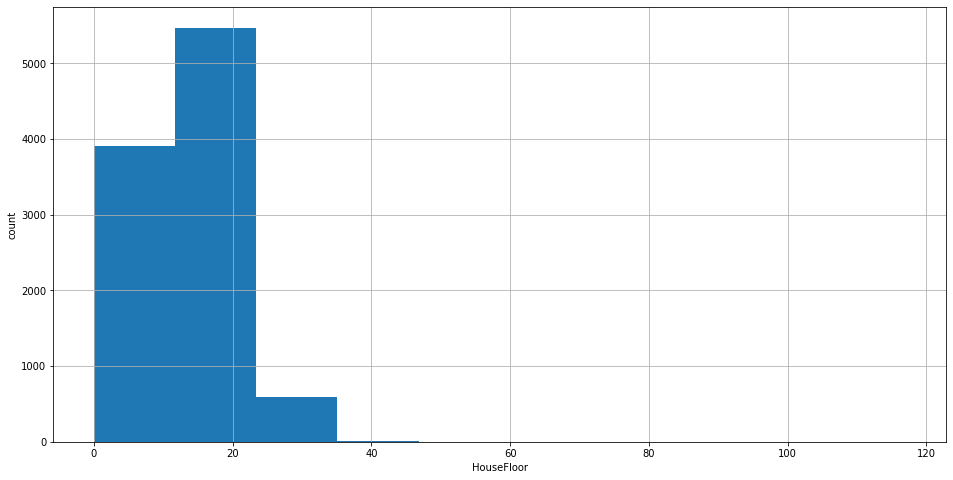

In [17]:
plt.figure(figsize = (16, 8))

X['HouseFloor'].hist()  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('HouseFloor')

plt.show()

In [16]:
X['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
48.0        2
99.0        2
39.0        2
117.0       1
29.0        1
31.0        1
38.0        1
44.0        1
36.0        1
26.0        1
45.0        1
47.0        1
Name: HouseFloor, dtype: int64

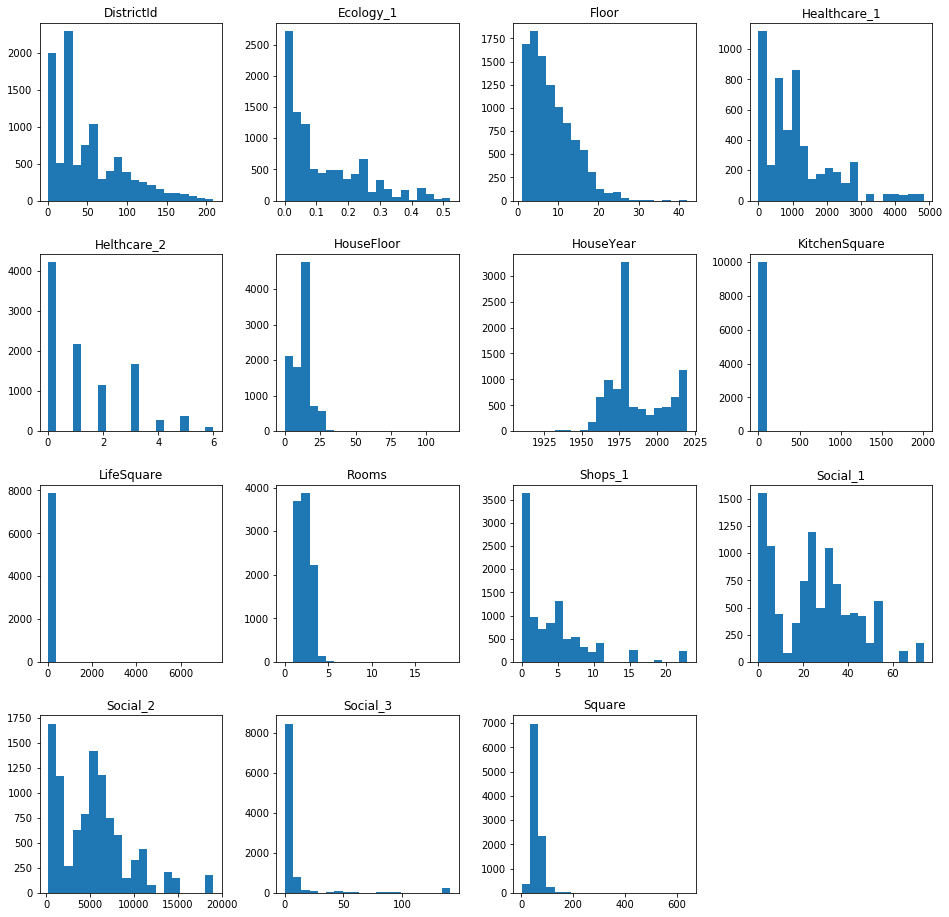

In [18]:
X.hist(figsize=(16,16), bins=20, grid=False);

In [19]:
X.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [20]:
medians = X.median()



In [24]:
X['Rooms'].value_counts()

2.0    3885
1.0    3707
3.0    2237
4.0     150
5.0      19
6.0       1
8.0       1
Name: Rooms, dtype: int64

In [36]:
#Сначала вычислим количество комнат из расчета медианнй площади одной комнаты и на эту величину поделим общую площадь
roomsquare_median = X['Square'].median()/X['Rooms'].median()
X.loc[(X['Rooms']< 1) | (X['Rooms'] > 6),'Rooms'] = round(X['Square']/roomsquare_median)
# Если округление = 0 то поставим 1
X.loc[X['Rooms']< 1,'Rooms'] = 1

In [25]:
# Исправим маленькую площадь (< 12)
#Исправим площадь общую
X.loc[X['Square'] < 12, 'Square'] = df['Rooms'] * roomsquare_median

In [26]:
# Исправим жилую площадь LifeSquare. Сначала удалим все значения где LifeSquare > общей площади
X.loc[X['LifeSquare']>X['Square'],'LifeSquare']  = np.nan

#Заполняем пропущенные LifeSquare через Square * коэф (средняя жилая на среднюю общую площадь)
ls_s_median = X['LifeSquare'].median()/X['Square'].median()
X.loc[X['LifeSquare'].isnull(),'LifeSquare'] = X['Square'] * ls_s_median

In [28]:
# Убираем 0 в HouseFloor
X.loc[X['HouseFloor']<1, 'HouseFloor'] = X['Floor']
#Исправляем этажность дома где он меньше чем этаж квартиры
X.loc[(X['HouseFloor']<X['Floor']), 'HouseFloor'] = X['Floor']

In [29]:
# Убираем выбросы в KitchenSquare
ks_s_median = X['KitchenSquare'].median()/X['Square'].median()
X.loc[(X['KitchenSquare'] < 1) | (X['KitchenSquare'] > 30 ), 'KitchenSquare' ] = X['Square'] * ks_s_median

In [31]:
# Исправим пропуски 'Healthcare_1'
X.loc[X['Healthcare_1'].isnull(), 'Healthcare_1'] = 0

In [32]:
# Выбросы (outliers)

# Кухня больше чем треть квартиры
X.loc[X['KitchenSquare'] > (X['Square']/3), 'KitchenSquare' ] = X['Square'] * ks_s_median

In [ ]:
# Относительная высота квартиры в доме
X['h_relative'] = X['Floor']/X['HouseFloor']

In [33]:

# Обработка категорий
X['Ec_2'] = X['Ecology_2'].apply(lambda x: 1 if x == 'A' else 0)
X['Ec_3'] = X['Ecology_3'].apply(lambda x: 1 if x == 'A' else 0)
X['Sh_2'] = X['Shops_2'].apply(lambda x: 1 if x == 'A' else 0)
X = X.drop(['Ecology_2','Ecology_3','Shops_2'], axis=1)


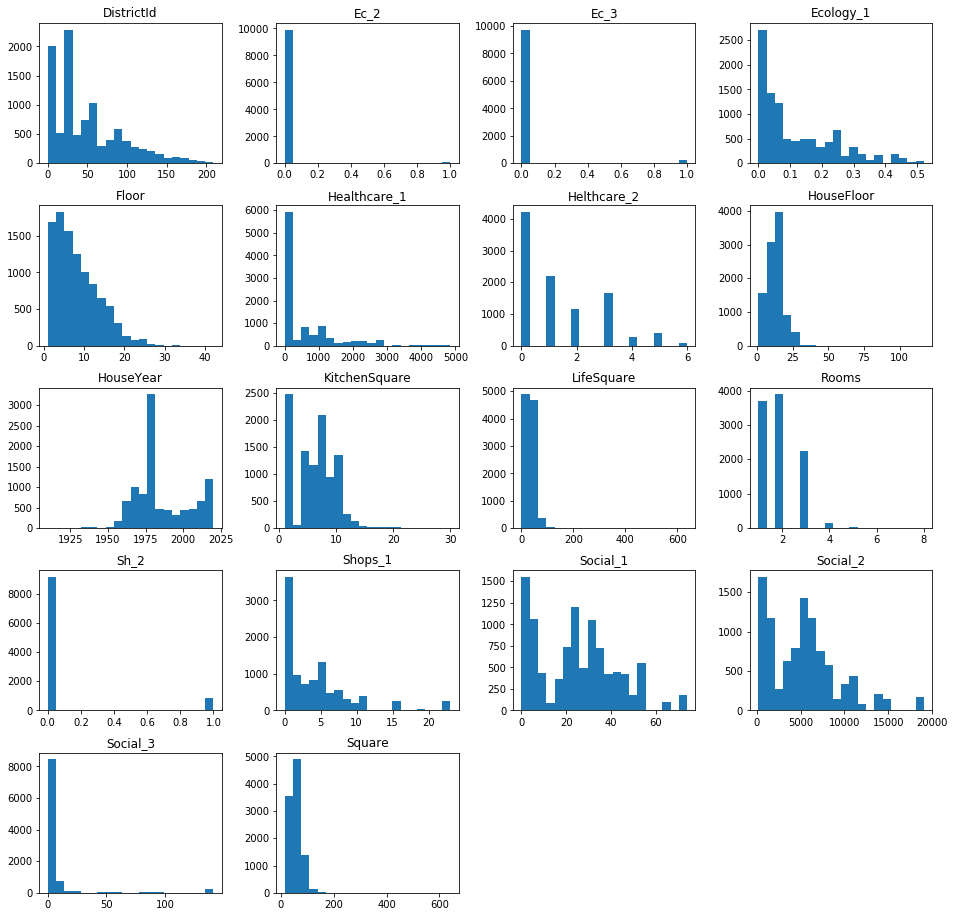

In [34]:
X.hist(figsize=(16,16), bins=20, grid=False);

In [39]:
X[(X['Square']>200) & (X['Rooms']<3)]
#df[(df['Square']>200) & (df['Rooms']<3)]
#X_final[(X_final['Square']>200) & (X_final['Rooms']<5)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ec_2,Ec_3,Sh_2
Id,,,,,,,,,,,,,,,,,,
28,9,2.0,604.705972,368.514475,1.0,17,18.0,1977,0.161532,25,5648,1,30.0,2,4,0,0,0
2307,102,1.0,409.425181,249.508212,10.0,4,4.0,2016,0.238617,26,3889,6,705.0,3,6,0,0,0
11602,30,2.0,641.065193,638.163193,10.0,20,20.0,2019,0.000078,22,6398,141,1046.0,3,23,0,0,0


In [40]:
id_LS = X[X['LifeSquare'].isnull()].index
print(id_LS)

Int64Index([], dtype='int64', name='Id')


In [271]:
#X.loc[id_LS]

In [41]:
#проверяем на тесте
X_final[X_final['KitchenSquare']> X_final['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,NaN,1,2,B
3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B
12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [44]:
X_final[X_final['Square']<10]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B
170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [45]:
df['pps'] = df['Price']/df['Square']


In [46]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,pps
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,594.538900,1.319500,4.231300,214138.857399,3988.383777
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,932.112976,1.493601,4.806341,92872.293865,3755.437224
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,208.293451
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,0.000000,1.000000,153872.633942,2918.525328
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,30.000000,1.000000,3.000000,192269.644879,3910.052336
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171,4692.375993
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,230463.537966


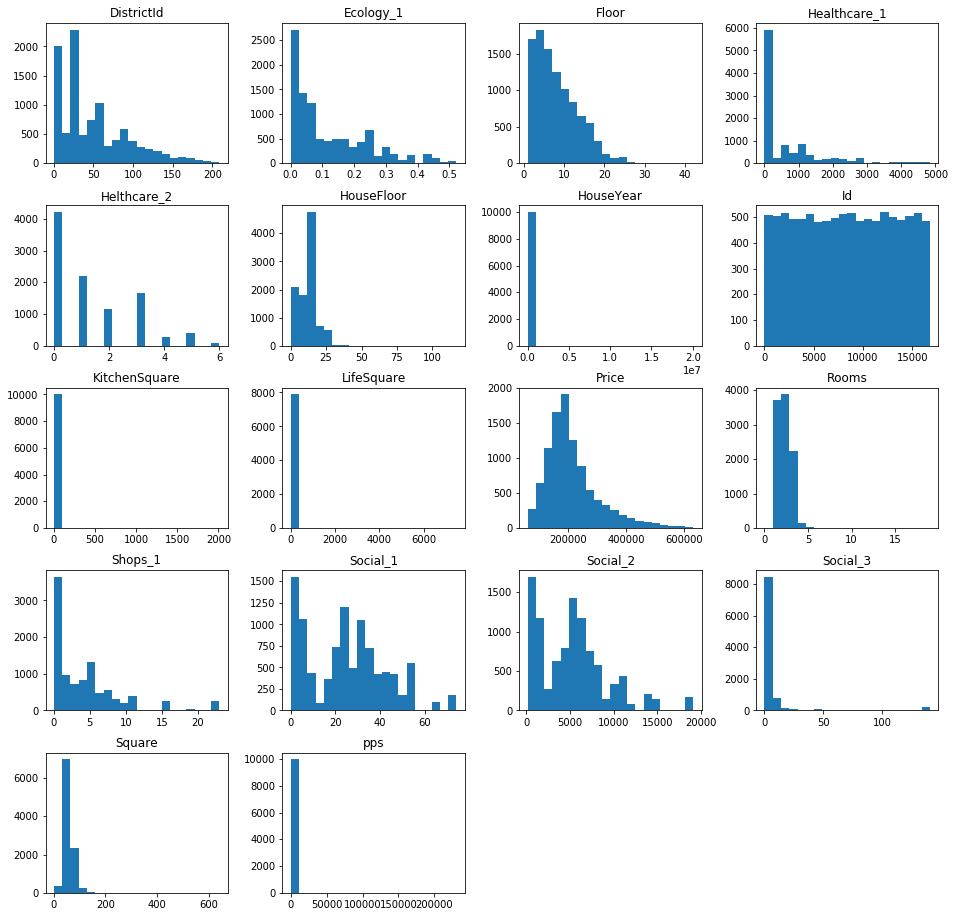

In [47]:
df.hist(figsize=(16,16), bins=20, grid=False);

In [48]:
import seaborn as sns

In [49]:
df1 = df[(df['Square']>10) & (df['Square']< 400)]

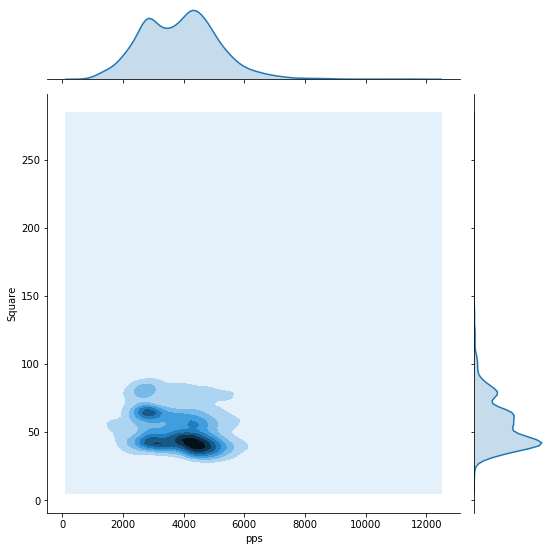

In [50]:
grid = sns.jointplot(df1['pps'], df1['Square'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

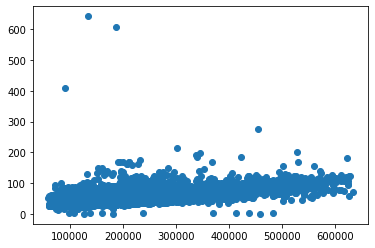

In [51]:
plt.scatter(df['Price'], df['Square'])
plt.show()

In [52]:
X_final.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


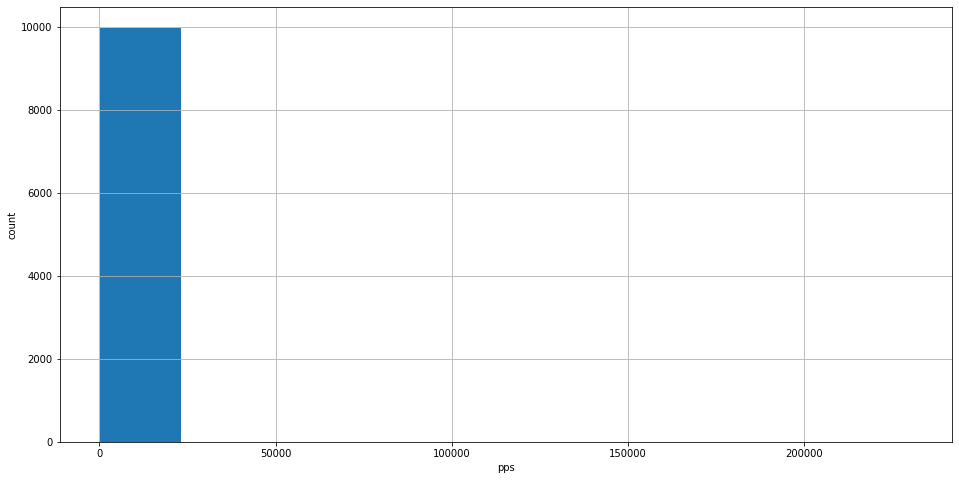

In [53]:
plt.figure(figsize = (16, 8))

df['pps'].hist()  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('pps')

plt.show()

In [54]:
df[df['pps']>12000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,pps
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,...,B,43,8429,3,0.0,3,9,B,412511.088764,75042.110444
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,...,B,4,915,0,0.0,0,0,B,107604.269441,23223.115671
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,...,B,5,1564,0,540.0,0,0,B,137597.601458,52996.529388
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,...,B,9,1892,0,0.0,0,1,B,97560.720383,22270.446581
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,...,B,16,3433,4,2643.0,4,5,B,369472.403061,72032.840662
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,B,2,469,0,0.0,0,0,B,126596.941798,53253.578837
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,B,9,1892,0,0.0,0,1,B,161379.067034,36757.837204
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,...,B,1,264,0,0.0,0,1,B,181434.825589,159593.107918
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,...,B,1,264,0,0.0,0,1,B,237716.681261,49281.194174
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,...,B,53,13670,4,0.0,1,11,B,458378.777006,230463.537966


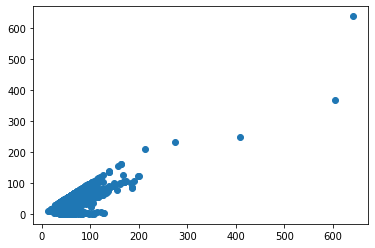

In [55]:
plt.scatter(X['Square'], X['LifeSquare'])
plt.show()

In [57]:
X_final.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


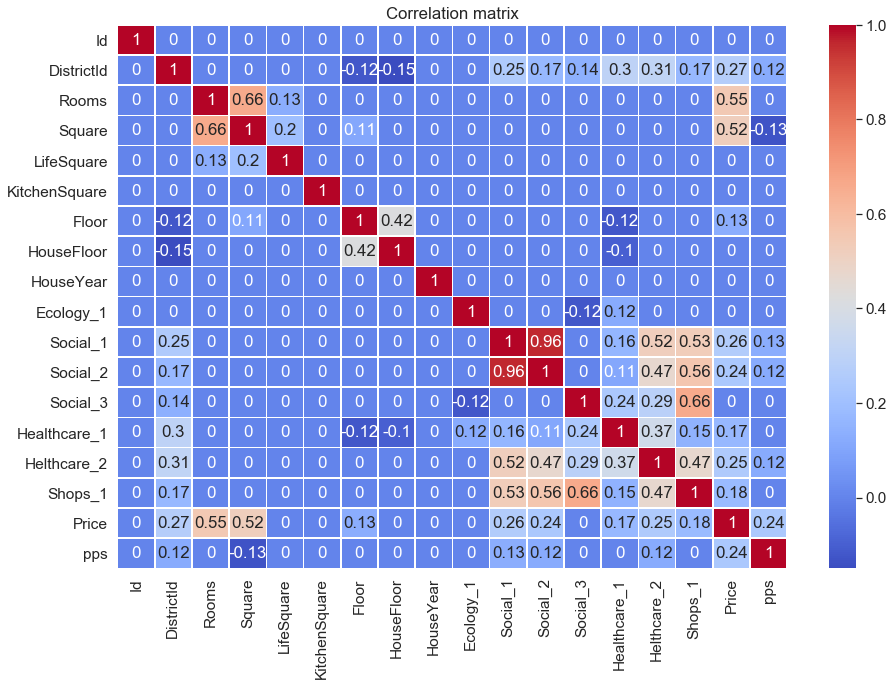

In [58]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()